In [317]:
## Import Common Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler,PolynomialFeatures,PowerTransformer, OneHotEncoder,LabelEncoder

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, classification_report

In [65]:
df = pd.read_csv('e-shop.csv', sep=';')
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1.0,5.0,1.0,28.0,2.0,1.0
1,2008,4,1,2,29,1,1,A16,1.0,6.0,1.0,33.0,2.0,1.0
2,2008,4,1,3,29,1,2,B4,10.0,2.0,1.0,52.0,1.0,1.0
3,2008,4,1,4,29,1,2,B17,6.0,6.0,2.0,38.0,2.0,1.0
4,2008,4,1,5,29,1,2,B8,4.0,3.0,2.0,52.0,1.0,1.0


## Defining Problem

Sebuah perusahaan online shop ingin meningkatkan penjualan dari produk-produknya, karena setiap tahunnya penjualannya produk menurun. agar dapat menyaingi kompetitor perusahaan E-commerce lainnya

## Defining Goals

In [ ]:
memprediksi harga rata-rata suatu produk berdasarkan customer behaviour ketika belanja di online shop

## Describe Data - Termasuk Handling Missing Value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77398 entries, 0 to 77397
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     77398 non-null  int64  
 1   month                    77398 non-null  int64  
 2   day                      77398 non-null  int64  
 3   order                    77398 non-null  int64  
 4   country                  77398 non-null  int64  
 5   session ID               77398 non-null  int64  
 6   page 1 (main category)   77398 non-null  int64  
 7   page 2 (clothing model)  77398 non-null  object 
 8   colour                   77397 non-null  float64
 9   location                 77397 non-null  float64
 10  model photography        77397 non-null  float64
 11  price                    77397 non-null  float64
 12  price 2                  77397 non-null  float64
 13  page                     77397 non-null  float64
dtypes: float64(6), int64(7

In [5]:
Desc = []

for i in df.columns:
    Desc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum()) / len(df)) * 100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample().values
    ])


In [7]:
pd.DataFrame(data = Desc, columns= [
    'Data Feature',
    'Data Types',
    'Null',
    'Null Pct',
    'Unique',
    'Unique Sample'
] )

,Data Feature,Data Types,Null,Null Pct,Unique,Unique Sample
0,year,int64,0,0.0,1,[2008]
1,month,int64,0,0.0,2,[4]
2,day,int64,0,0.0,30,[27]
3,order,int64,0,0.0,161,[82]
4,country,int64,0,0.0,40,[16]
5,session ID,int64,0,0.0,11157,[326]
6,page 1 (main category),int64,0,0.0,4,[2]
7,page 2 (clothing model),object,0,0.0,217,[P6]
8,colour,float64,1,0.0,14,[12.0]
9,location,float64,1,0.0,6,[2.0]


In [66]:
df.dropna(inplace=True)

In [67]:
df.isna().sum()

year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64

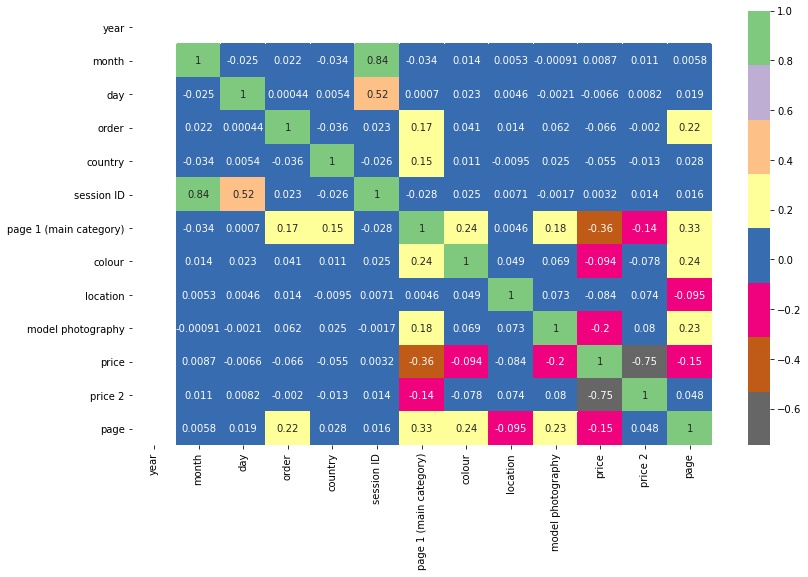

In [15]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True, cmap="Accent_r")
plt.show()

## Handling Imbalance data

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,77398.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
month,77398.0,4.377258,0.484703,4.0,4.0,4.0,5.0,5.0
day,77398.0,13.662937,8.305600,1.0,7.0,14.0,20.0,30.0
order,77398.0,9.743559,12.210984,1.0,2.0,6.0,12.0,161.0
country,77398.0,26.507610,7.591558,2.0,29.0,29.0,29.0,47.0
session ID,77398.0,5578.919261,3217.708372,1.0,2805.0,5527.5,8359.0,11157.0
page 1 (main category),77398.0,2.387930,1.138731,1.0,1.0,2.0,3.0,4.0
colour,77397.0,6.323708,4.273022,1.0,3.0,6.0,9.0,14.0
location,77397.0,3.278758,1.712300,1.0,2.0,3.0,5.0,6.0
model photography,77397.0,1.257413,0.437212,1.0,1.0,1.0,2.0,2.0


### Checking Imbalance Data

In [262]:
df['price 2'].value_counts()

1.0    39244
2.0    38153
Name: price 2, dtype: int64

In [263]:
pd.crosstab(index=df['price 2'], columns='count', normalize=True) * 100

col_0,count
price 2,
1.0,50.704808
2.0,49.295192


## Pengelompokkan Data

In [68]:
df['month'].value_counts()

4    48199
5    29198
Name: month, dtype: int64

In [70]:
## Recategorize Month
df['month_encode'] = df['month'].map({4 : 'April', 5 : 'August'})

In [81]:
## Recategorize Page
df['page_encode'] = df['page'].map({1.0 : 'trousers', 2.0 : 'skirts', 3.0 : 'blouses', 4.0 : 'sale'})

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,month_encode,page_encode
0,2008,4,1,1,29,1,1,A13,1.0,5.0,1.0,28.0,2.0,1.0,April,trousers
1,2008,4,1,2,29,1,1,A16,1.0,6.0,1.0,33.0,2.0,1.0,April,trousers
2,2008,4,1,3,29,1,2,B4,10.0,2.0,1.0,52.0,1.0,1.0,April,trousers
3,2008,4,1,4,29,1,2,B17,6.0,6.0,2.0,38.0,2.0,1.0,April,trousers
4,2008,4,1,5,29,1,2,B8,4.0,3.0,2.0,52.0,1.0,1.0,April,trousers


In [83]:
## Recategorize Location
df['location_encode'] = df['location'].map({1 : 'top left', 2 : 'top in the middle', 3 : 'top right', 4 : 'bottom left', 5 : 'bottom in the middle', 6 : 'bottom right'})

In [85]:
## Label Encoding Price 2
df['price2_encode'] = df['price 2'].map({1 : 'yes', 2 : 'no'})

In [237]:
# Re-Categorize Kolom Price
bin_price = [18.0, 28.0, 50.0, 62.0, 82.0]
label_price = ['18 USD - 28 USD','33 USD - 50 USD', '52 USD - 60 USD', '62 USD - 82 USD']
df['price_range'] = pd.cut(df['price'], bins=bin_price, labels=label_price)

## Data Analysis

In [246]:
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,month_encode,page_encode,location_encode,price2_encode,price_range
0,2008,4,1,1,29,1,1,A13,1.0,5.0,1.0,28.0,2.0,1.0,April,trousers,bottom in the middle,no,18 USD - 28 USD
1,2008,4,1,2,29,1,1,A16,1.0,6.0,1.0,33.0,2.0,1.0,April,trousers,bottom right,no,33 USD - 50 USD
2,2008,4,1,3,29,1,2,B4,10.0,2.0,1.0,52.0,1.0,1.0,April,trousers,top in the middle,yes,52 USD - 60 USD
3,2008,4,1,4,29,1,2,B17,6.0,6.0,2.0,38.0,2.0,1.0,April,trousers,bottom right,no,33 USD - 50 USD
4,2008,4,1,5,29,1,2,B8,4.0,3.0,2.0,52.0,1.0,1.0,April,trousers,top right,yes,52 USD - 60 USD


In [279]:
df['price2_encode'].value_counts()

yes    39244
no     38153
Name: price2_encode, dtype: int64

In [268]:
pd.crosstab(index=df['month_encode'], columns=df['price2_encode'], margins=True)

price2_encode,no,yes,All
month_encode,,,
April,23558,24641,48199
August,14595,14603,29198
All,38153,39244,77397


In [276]:
pd.crosstab(index=df['page_encode'], columns=df['price2_encode'], margins=True)

price2_encode,no,yes,All
page_encode,,,
blouses,6418,2717,9135
sale,1657,2100,3757
skirts,9102,11261,20363
trousers,20611,22516,43127
All,37788,38594,76382


In [278]:
pd.crosstab(index=df['location_encode'], columns=df['price2_encode'])

price2_encode,no,yes
location_encode,,
bottom in the middle,7679,6054
bottom left,7088,5550
bottom right,4711,4888
top in the middle,7838,7838
top left,6607,9218
top right,4230,5696


In [271]:
pd.crosstab(index=df['price_range'], columns=df['price2_encode'])

price2_encode,no,yes
price_range,,
18 USD - 28 USD,11348,0
33 USD - 50 USD,26676,17588
52 USD - 60 USD,0,18066
62 USD - 82 USD,0,3590


In [272]:
pd.crosstab(index=df['colour'], columns=df['price2_encode'])

price2_encode,no,yes
colour,,
1.0,3265,797
2.0,5080,8353
3.0,6935,6109
4.0,3501,4038
5.0,423,186
6.0,5333,2966
7.0,2652,676
8.0,1104,0
9.0,3103,3577


In [294]:
pd.crosstab(index=df['country'], columns=df['price2_encode'], margins=True)

price2_encode,no,yes,All
country,,,
2,6,9,15
3,100,95,195
6,3,2,5
7,5,4,9
8,1,0,1
9,5166,4975,10141
10,25,17,42
11,3,6,9
12,39,28,67


## Data Visualization

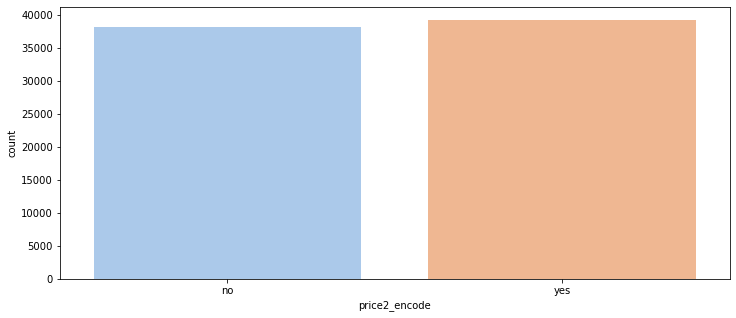

In [280]:
plt.figure(figsize = (12, 5))
sns.countplot(df['price2_encode'], palette = 'pastel')
plt.show()

Insight:
Persebaran harga rata2 untuk seluruh kategori produk bisa dikatakan balanced walaupun ada gap yang sedikit

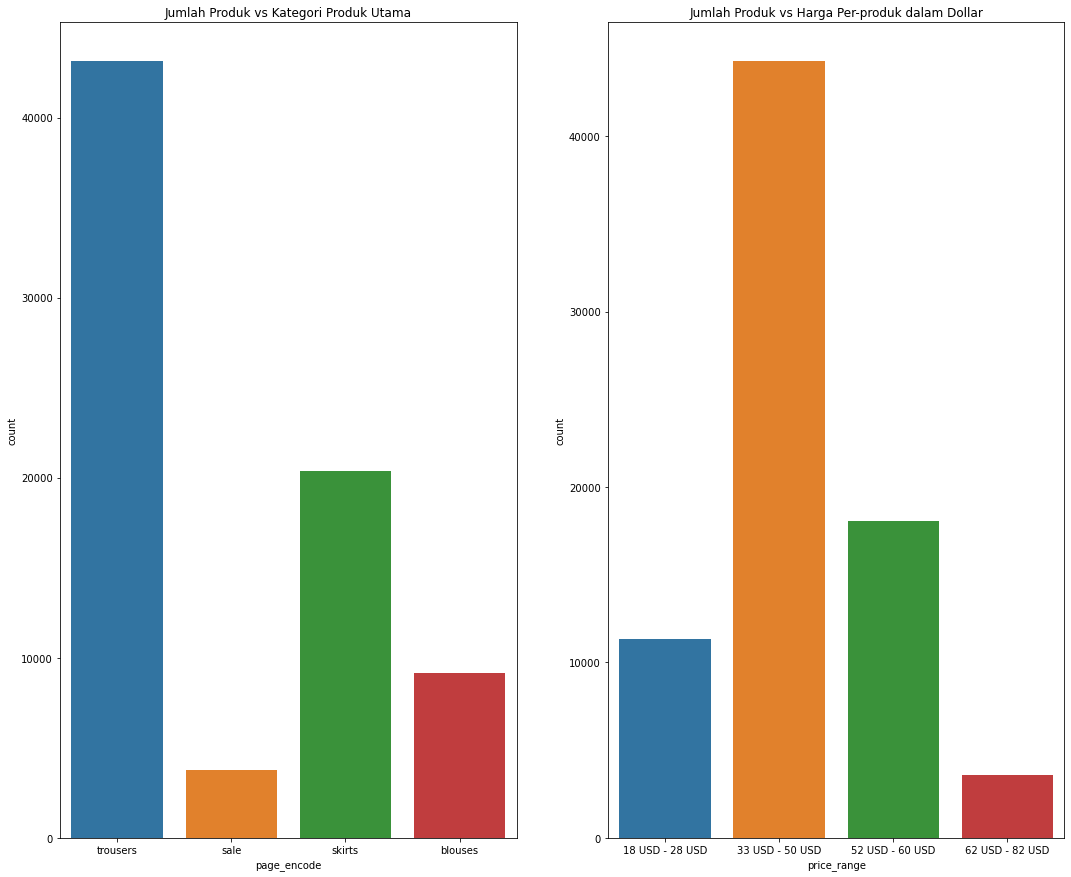

In [283]:
plt.figure(figsize = (18, 15))
plt.subplot(1,2,1)
sns.countplot(df['page_encode'])
plt.title('Jumlah Produk vs Kategori Produk Utama')
plt.subplot(1,2,2)
sns.countplot(df['price_range'])
plt.title('Jumlah Produk vs Harga Per-produk dalam Dollar')
plt.show()

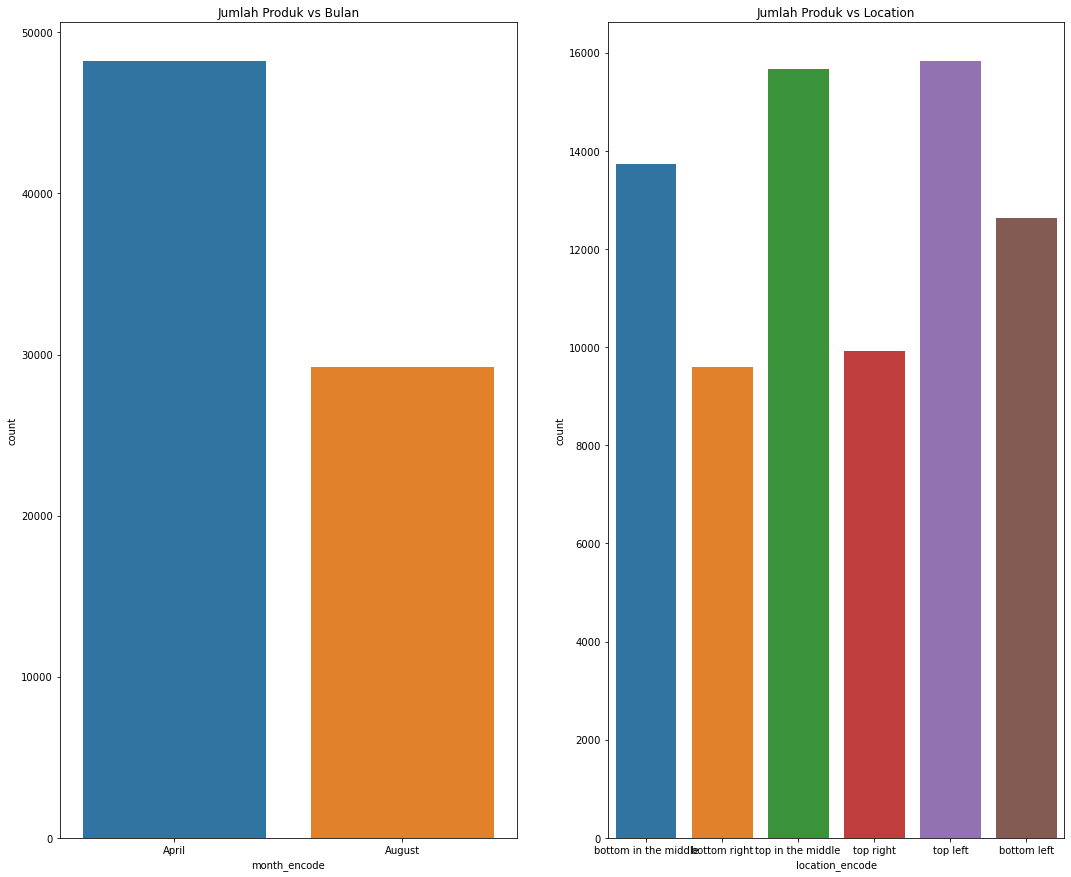

In [287]:
plt.figure(figsize = (18, 15))
plt.subplot(1,2,1)
sns.countplot(df['month_encode'])
plt.title('Jumlah Produk vs Bulan')
plt.subplot(1,2,2)
sns.countplot(df['location_encode'])
plt.title('Jumlah Produk vs Location')
plt.show()

## Data Preparation

### Feature Selection

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77397 entries, 0 to 77396
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     77397 non-null  int64  
 1   month                    77397 non-null  int64  
 2   day                      77397 non-null  int64  
 3   order                    77397 non-null  int64  
 4   country                  77397 non-null  int64  
 5   session ID               77397 non-null  int64  
 6   page 1 (main category)   77397 non-null  int64  
 7   page 2 (clothing model)  77397 non-null  object 
 8   colour                   77397 non-null  float64
 9   location                 77397 non-null  float64
 10  model photography        77397 non-null  float64
 11  price                    77397 non-null  float64
 12  price 2                  77397 non-null  float64
 13  page                     77397 non-null  float64
 14  month_encode          

In [194]:
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,month_encode,page_encode,location_encode,price2_encode
0,2008,4,1,1,29,1,1,A13,1.0,5.0,1.0,28.0,2.0,1.0,April,trousers,bottom in the middle,no
1,2008,4,1,2,29,1,1,A16,1.0,6.0,1.0,33.0,2.0,1.0,April,trousers,bottom right,no
2,2008,4,1,3,29,1,2,B4,10.0,2.0,1.0,52.0,1.0,1.0,April,trousers,top in the middle,yes
3,2008,4,1,4,29,1,2,B17,6.0,6.0,2.0,38.0,2.0,1.0,April,trousers,bottom right,no
4,2008,4,1,5,29,1,2,B8,4.0,3.0,2.0,52.0,1.0,1.0,April,trousers,top right,yes


In [190]:
## Correlation Ratio
def corr_ratio(categories, measurement):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range (0, cat_num):
        cat_measure = measurement[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measure)
        y_avg_array[i] = np.average(cat_measure)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurement, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [191]:
corr_ratio(df['page 2 (clothing model)'], df['price'])

1.0

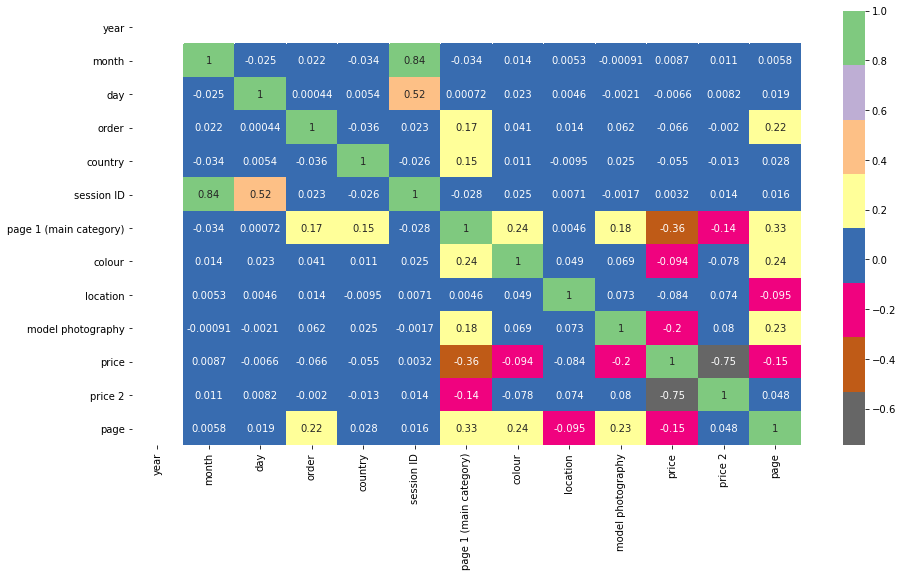

In [197]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cbar=True, cmap="Accent_r")
plt.show()

In [297]:
df_ML = df[['month', 'day', 'order', 'country','page 1 (main category)', 'colour','model photography', 'location', 'price 2', 'price']]
df_ML.head()

,month,day,order,country,page 1 (main category),colour,model photography,location,price 2,price
0,4,1,1,29,1,1.0,1.0,5.0,2.0,28.0
1,4,1,2,29,1,1.0,1.0,6.0,2.0,33.0
2,4,1,3,29,2,10.0,1.0,2.0,1.0,52.0
3,4,1,4,29,2,6.0,2.0,6.0,2.0,38.0
4,4,1,5,29,2,4.0,2.0,3.0,1.0,52.0


# Machine Learning Modelling

### Splitting Data

In [298]:
X = df_ML.drop(columns=['price 2'])
y = df_ML['price 2']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.20, random_state=42)

### Modelling

In [299]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [301]:
RF = RandomForestClassifier(random_state=46)
RF.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [318]:
KNN_1 = KNeighborsRegressor()
KNN_1.fit(X_train, y_train)

KNeighborsRegressor()

## Evaluation Matrix Base Model

In [302]:
## Logistic Regression

In [303]:
y_predtr_LR = LR.predict(X_train)
print('Classification Report LogisticRegression Train')
print(classification_report(y_train, y_predtr_LR))

Classification Report LogisticRegression Train
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     31395
         2.0       1.00      1.00      1.00     30522

    accuracy                           1.00     61917
   macro avg       1.00      1.00      1.00     61917
weighted avg       1.00      1.00      1.00     61917



In [304]:
y_predts_LR = LR.predict(X_test)
print('Classification Report LogisticRegression Test')
print(classification_report(y_test, y_predts_LR))

Classification Report LogisticRegression Test
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      7849
         2.0       1.00      1.00      1.00      7631

    accuracy                           1.00     15480
   macro avg       1.00      1.00      1.00     15480
weighted avg       1.00      1.00      1.00     15480



In [305]:
## RandomForestClassifier

In [306]:
y_predtr_RF = RF.predict(X_train)
print('Classification Report RF Train')
print(classification_report(y_train, y_predtr_RF))

Classification Report RF Train
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     31395
         2.0       1.00      1.00      1.00     30522

    accuracy                           1.00     61917
   macro avg       1.00      1.00      1.00     61917
weighted avg       1.00      1.00      1.00     61917



In [307]:
y_predts_RF = RF.predict(X_test)
print('Classification Report RF Test')
print(classification_report(y_test, y_predts_RF))

Classification Report RF Test
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      7849
         2.0       1.00      1.00      1.00      7631

    accuracy                           1.00     15480
   macro avg       1.00      1.00      1.00     15480
weighted avg       1.00      1.00      1.00     15480



In [329]:
RF.feature_importances_
pd.DataFrame(RF.feature_importances_, index = X_train.columns, columns=['Feature Importances']).sort_values('Feature Importances', ascending=False)

,Feature Importances
price,0.747225
page 1 (main category),0.150916
colour,0.063856
location,0.024285
model photography,0.009189
order,0.001908
country,0.001824
day,0.000664
month,0.000133


## Improvement

In [320]:
## KNN Hyper Parameter Tuning

In [319]:
KNeighborsRegressor()

KNeighborsRegressor()

In [321]:
param_KNN = {
    "n_neighbors" : np.arange(1, 51, 2),
    "weights" : ['uniform', 'distance'],
    "p" : [1, 2]
}

In [322]:
ModelKNN = KNeighborsRegressor()

In [323]:
KNN_Tuned = GridSearchCV(ModelKNN, param_KNN, cv=3, n_jobs=-1, verbose=1)

In [324]:
KNN_Tuned.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.3min finished


GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=1)

### RandomForestClassifier Fine Tuning
untuk memperkecil Overfitting (selisih hasil train dan testing) menjadi Just Fit

In [333]:
param_RF2 = {
    'n_estimators' : np.arange(300,901,300),
    'max_depth' : [5,7],
    'min_samples_leaf' : np.arange(30,41,2),
    'min_samples_split' : np.arange(30,41,2)*2,
}
skf2 = StratifiedKFold(n_splits=3, shuffle=True, random_state=46)

In [334]:
y_predts_RF_Tuned2 = RF_Tuned2.predict(X_test)
print('Classification Report RF_Tuned2 Test')
print(classification_report(y_test, y_predts_RF_Tuned2))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

## Improvement dgn Model

In [335]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

### KNeighboursClassifier

In [336]:
y_predtr_KNN = KNN.predict(X_train)
print('Classification Report KNN Train')
print(classification_report(y_train, y_predtr_KNN))

Classification Report KNN Train
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99     31395
         2.0       0.99      0.99      0.99     30522

    accuracy                           0.99     61917
   macro avg       0.99      0.99      0.99     61917
weighted avg       0.99      0.99      0.99     61917



In [337]:
y_predts_KNN = KNN.predict(X_test)
print('Classification Report KNN Test')
print(classification_report(y_test, y_predts_KNN))

Classification Report KNN Test
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99      7849
         2.0       0.99      0.99      0.99      7631

    accuracy                           0.99     15480
   macro avg       0.99      0.99      0.99     15480
weighted avg       0.99      0.99      0.99     15480



### SVC

In [338]:
SVM = SVC()
SVM.fit(X_train,y_train)

SVC()

In [339]:
y_predtr_SVM = SVM.predict(X_train)
print('Classification Report SVC Train')
print(classification_report(y_train, y_predtr_SVM))

Classification Report SVC Train
              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99     31395
         2.0       1.00      0.98      0.99     30522

    accuracy                           0.99     61917
   macro avg       0.99      0.99      0.99     61917
weighted avg       0.99      0.99      0.99     61917



In [340]:
y_predts_SVM = SVM.predict(X_test)
print('Classification Report SVC Test')
print(classification_report(y_test, y_predts_SVM))

Classification Report SVC Test
              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99      7849
         2.0       1.00      0.98      0.99      7631

    accuracy                           0.99     15480
   macro avg       0.99      0.99      0.99     15480
weighted avg       0.99      0.99      0.99     15480



## Insight:

- Persebaran harga rata-rata untuk semua kategori produk Balanced
- Harga rata-rata untuk seluruh kategori produk di dominasi di Bulan April 
- Harga rata-rata untuk seluruh kategori produk di dominasi dengan Kategori Trousers dan Skirts
- Persebaran data Location Balanced di setiap Harga rata-rata untuk seluruh kategori produk 
- Persebaran data Price tidak Balanced di setiap kolom Harga rata-rata untuk seluruh kategori produk 
- Persebaran data Colour Balanced di setiap Harga rata-rata untuk seluruh kategori produk 
- Persebaran data Country cenderung tidak balanced di setiap Harga rata-rata untuk seluruh kategori produk

## Conclusion

Model Machine Learning yg memiliki Nilai Evaluation Matrix (Accuracy) adalah 